# EnKF Experiments - GCS

## Imports

In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
from scipy.stats import shapiro, kruskal
import seaborn as sns
import sys

In [2]:
sys.path.append('../../../../stationsim/')
from ensemble_kalman_filter import EnsembleKalmanFilter, AgentIncluder, Inflation
from stationsim_gcs_model import Model

In [3]:
sys.path.append('../')
from experiment_utils import Modeller, Processor, Visualiser

In [4]:
%matplotlib inline
np.random.seed(42)

## Functions

In [5]:
def tidy_dataframe(df, independent_col: str, dependent_cols: list):
    output = list()
    
    for i, row in df.iterrows():
        for col in dependent_cols:
            d = {independent_col: row[independent_col],
                 'variable':  col,
                 'value': row[col]}
            output.append(d)
    
    output = pd.DataFrame(output)
    return output

## Data paths

In [6]:
data_dir = '../results/data/exp1/'
model_dir = '../results/models/exp1/'
fig_dir = '../results/figures/exp1/'

## Experiment 1 - Setting Up EnKF

### Base model inclusion in error calculations

In [7]:
p = 2
e = 5

In [8]:
Modeller.run_experiment_1(pop_size=p, ensemble_size=e, standardise_state=True,
                          inclusion=AgentIncluder.MODE_EN)

/home/keiran/Documents/dev/dust/Projects/ABM_DA/experiments/enkf_experiments/results_3/noteooks/../../../../stationsim/ensemble_kalman_filter.py:202: RuntimeWarning: EnKF received unexpected attribute (vanilla_ensemble_size).
  warns.warn(w, RuntimeWarning)
/home/keiran/Documents/dev/dust/Projects/ABM_DA/experiments/enkf_experiments/results_3/noteooks/../../../../stationsim/ensemble_kalman_filter.py:202: RuntimeWarning: EnKF received unexpected attribute (inflation_rate).
  warns.warn(w, RuntimeWarning)


Running Ensemble Kalman Filter...
max_iterations:	5000
ensemble_size:	5
assimilation_period:	20
pop_size:	2
filter_type:	EnsembleKalmanFilterType.DUAL_EXIT
inclusion_type:	AgentIncluder.MODE_EN
ensemble_errors:	False
d: [[399.73676333 401.18568957 399.7134499  399.74255258 402.13441594]
 [462.55328978 462.09945234 460.24155928 462.07921182 461.62716333]
 [ 21.9682692   23.27726585  21.44386238  22.07433069  21.27474529]
 [  9.50116811   9.40551028   8.96052007  11.30167302  10.01708189]]
s: [[ 4.00718876e+02  4.94074819e+02  4.67498065e+02  5.13935186e+02
   3.88890507e+02]
 [ 3.89561210e+02  5.06224062e+02  3.77734046e+02  4.46850868e+02
   4.63876461e+02]
 [ 1.98295724e+01  2.27913927e+01  2.24925182e+01  2.29072924e+01
   2.03841079e+01]
 [ 9.96209069e+00  8.37214393e+00  9.93713023e+00  8.59143718e+00
   8.66655597e+00]
 [ 1.49921323e-01  7.12268032e-01  6.75017593e-01  6.90040772e-01
   3.06583214e-01]
 [ 2.15855360e+00 -2.76289477e+00  2.21987474e+00 -2.81718596e+00
  -2.88348770

In [9]:
Processor.process_experiment_1(pop_size=p)

#### Read data

In [10]:
results = pd.read_csv(data_dir + f'p{p}/metrics.csv')
results.head()

,time,forecast,obs,exit_accuracy,analysis,baseline
0,20,39.780491,1.552747,0.5,1.619325,1.619325
1,40,6.283414,0.940285,0.5,0.983041,0.983041
2,60,6.526645,2.103724,0.5,6.504988,6.504988
3,80,11.983510,1.657743,0.0,9.748007,9.748007
4,100,17.070667,0.607967,0.0,15.577513,15.577513


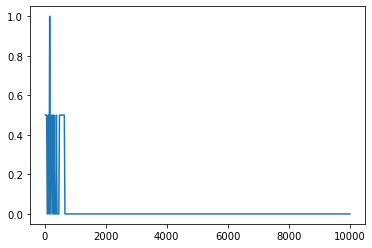

In [11]:
plt.figure()
plt.plot(results['time'], results['exit_accuracy'])
plt.show()

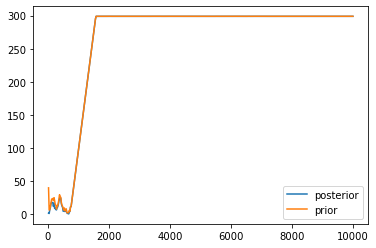

In [12]:
plt.figure()
plt.plot(results['time'], results['analysis'], label='posterior')
plt.plot(results['time'], results['forecast'], label='prior')
plt.legend()
plt.show()

In [13]:
with open(f'../results/models/exp1/p{p}/model.pkl', 'rb') as f:
    enkf = pickle.load(f)

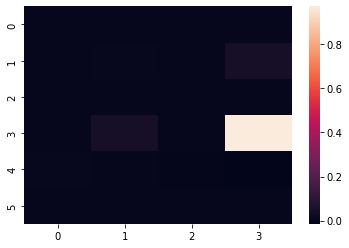

In [14]:
sns.heatmap(enkf.gain_matrix)
plt.show()

In [15]:
len(enkf.state_ensemble)

6

1


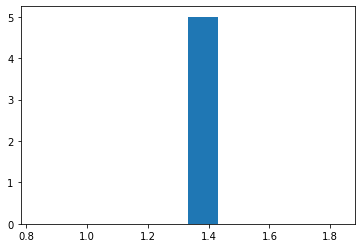

In [16]:
print(enkf.base_model.agents[-1].gate_out)
plt.hist(enkf.state_ensemble[-1])
plt.show()

4


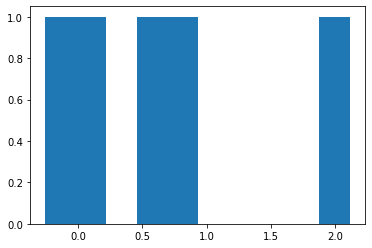

In [17]:
print(enkf.base_model.agents[-2].gate_out)
plt.hist(enkf.state_ensemble[-2])
plt.show()

In [18]:
print(len(enkf.results))

500


In [19]:
print(len(enkf.results[0]))

18


In [20]:
print(enkf.results[0])

{'time': 20, 'ground_truth': array([398.26717392,  20.65377972, 461.63287071,   9.86063169]), 'prior': array([453.02349068, 436.84932941,  21.68097671,   9.1058716 ,
         0.50676619,  -0.81702802]), 'posterior': array([ 4.00555821e+02,  4.61694259e+02,  2.06366081e+01,  8.91267862e+00,
        3.50890876e-01, -1.60143771e+00]), 'observation': array([400.56795959,  22.4435768 , 461.60393975,   9.67230703]), 'destination': array([732.65      , 478.16748919, 137.64451222, 692.65      ]), 'origin': array([388.54384679,   7.35      , 462.82418311,   7.35      ]), 'prior_0': array([4.00718876e+02, 3.89561210e+02, 1.98295724e+01, 9.96209069e+00,
       1.49921323e-01, 2.15855360e+00]), 'posterior_0': array([ 3.99788073e+02,  4.62520589e+02,  2.01798672e+01,  9.01596661e+00,
        2.42969380e-01, -1.06541605e+00]), 'prior_1': array([494.07481856, 506.22406225,  22.79139265,   8.37214393,
         0.71226803,  -2.76289477]), 'posterior_1': array([ 4.01273069e+02,  4.62105527e+02,  2.08574

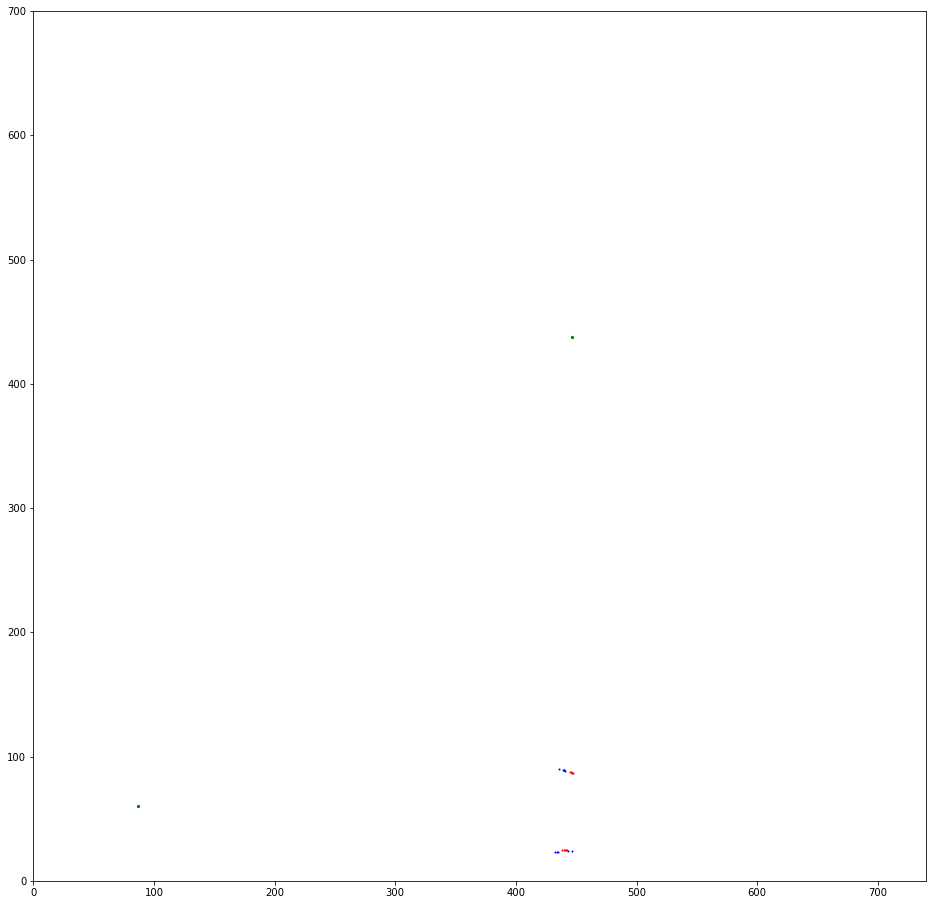

In [24]:
x = 5

plt.figure(figsize=(16, 16))

truth = enkf.results[x]['ground_truth']
truth_x = truth[:2]
truth_y = truth[2:4]
plt.scatter(truth_x, truth_y, color='green', s=5)



for i in range(e):
    prior_label = f'prior_{i}'
    posterior_label = f'posterior_{i}'
    
    prior = enkf.results[x][prior_label]
    posterior = enkf.results[x][posterior_label]
    
    
    prior_x = prior[:2]
    prior_y = prior[2:4]
    posterior_x = posterior[:2]
    posterior_y = posterior[2:4]
    
    plt.scatter(prior_x, prior_y, color='blue', s=1)
    plt.scatter(posterior_x, posterior_y, color='red', s=1)

plt.xlim((0, 740))
plt.ylim((0, 700))
plt.show()

* Look at standardisation
* scaling variables

In [ ]:
results.shape

#### Tidy up data

In [ ]:
results_cols = list(results)
error_types = [c for c in results_cols if c != 'time']

In [ ]:
base_error_types = ['forecast', 'obs', 'analysis', 'baseline']
ensemble_error_types = [e for e in error_types if e not in base_error_types]

In [ ]:
base_error_types

In [ ]:
ensemble_error_types

In [ ]:
base_tidy_df = tidy_dataframe(results, 'time', base_error_types)
base_tidy_df.head()

In [ ]:
ensemble_tidy_df = tidy_dataframe(results, 'time', ensemble_error_types)
ensemble_tidy_df.head()

In [ ]:
def analysis_to_model(row):
    model_number = row['variable'].split('_')[1]
    return f'Model {model_number}'

In [ ]:
ensemble_tidy_df['variable'] = ensemble_tidy_df.apply(analysis_to_model, axis=1)
ensemble_tidy_df.head()

### Ensemble member errors

In [ ]:
ensemble_mean = base_tidy_df.loc[base_tidy_df['variable']=='analysis', :]

In [ ]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='time', y='value', hue='variable', alpha=0.3, data=ensemble_tidy_df)
plt.plot(ensemble_mean['time'], ensemble_mean['value'], linewidth=3,
         color='black', label='Ensemble mean')
plt.ylabel('Error per agent')
plt.xlabel('Time')
plt.legend()
plt.savefig(fig_dir + 'lineplot.pdf')
plt.show()

In [ ]:
benchmark_mean = base_tidy_df.loc[base_tidy_df['variable']=='baseline', :]

In [ ]:
plt.figure(figsize=(8, 8))
plt.plot(ensemble_mean['time'], ensemble_mean['value'], label='Filter ensemble mean')
plt.plot(benchmark_mean['time'], benchmark_mean['value'], label='Benchmark ensemble mean')
plt.xlabel('Time')
plt.ylabel('Error per agent')
plt.legend()
plt.savefig(fig_dir + 'benchmark.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
sns.kdeplot(x='time', y='value', data=ensemble_tidy_df, fill=True, label='Ensemble models')
plt.plot(ensemble_mean['time'], ensemble_mean['value'], label='Ensemble mean')
plt.ylabel('Error per agent')
plt.xlabel('Time')
plt.legend()
plt.savefig(fig_dir + 'contourplot.pdf')
plt.show()

In [ ]:
plt.figure(figsize=(8, 8))
sns.lineplot(x='time', y='value', data=ensemble_tidy_df, label='Ensemble models')
plt.plot(ensemble_mean['time'], ensemble_mean['value'], label='Ensemble mean')
plt.ylabel('Error per agent')
plt.xlabel('Time')
plt.legend()
plt.savefig(fig_dir + 'lineplot_ci.pdf')
plt.show()

## Working - mean errors

Construct synthetic data:

In [ ]:
member_states = [{'x': 24, 'y': 26, 'label': 'Ensemble member'},
                  {'x': 23, 'y': 25, 'label': 'Ensemble member'},
                  {'x': 24, 'y': 24, 'label': 'Ensemble member'}]
mean_state = [{'x': 71/3, 'y': 25, 'label': 'Ensemble mean'}]
ground_state = [{'x': 25, 'y': 25, 'label': 'Ground truth'}]

working_states = member_states + mean_state + ground_state
                  
working_errors_df = pd.DataFrame(working_states)
working_errors_df

Construct line data:

In [ ]:
error_lines = [[[24, 25], [26, 25]],
               [[23, 25], [25, 25]],
               [[24, 25], [24, 25]],
               [[71/3, 25], [25, 25]]]

Plot:

In [ ]:
plt.figure()
sns.scatterplot(x='x', y='y', hue='label', data=working_errors_df, marker='x')
for el in error_lines:
    plt.plot(el[0], el[1], linestyle='dashed', color='grey', alpha=0.3)
plt.savefig(fig_dir + 'working_example.pdf')
plt.show()

Get means:

In [ ]:
members = working_errors_df.loc[working_errors_df['label']=='Ensemble member', :]
x_mean = members['x'].mean()
y_mean = members['y'].mean()

In [ ]:
en_mean = working_errors_df.loc[working_errors_df['label']=='Ensemble mean', :]

Check mean:

In [ ]:
assert x_mean == en_mean['x'].values[0]

In [ ]:
assert y_mean == en_mean['y'].values[0]

Error function:

In [ ]:
def calculate_error(ground_state, x, y):
    return np.sqrt((ground_state['x'] - x)**2 + (ground_state['y'] - y)**2)

Calculate mean error:

In [ ]:
ems = calculate_error(ground_state[0], mean_state[0]['x'], mean_state[0]['y'])
ems

Calculate member state errors:

In [ ]:
member_errors = list()
for m in member_states:
    member_errors.append(calculate_error(ground_state[0], m['x'], m['y']))

x = np.mean(member_errors)

In [ ]:
y = 2/3 * (np.sqrt(2) + 1)

Check that average error is correct:

In [ ]:
assert x == y

Check that error in mean state is less than or equal to the mean of the member model errors:

In [ ]:
assert ems <= x